## 🦙 Serving a Quantized LLaMA Model from HuggingFace Hub using the `llama-cpp-python` Library

Large Language Models (LLMs) like LLaMA (Large Language Model Meta AI) have gained widespread recognition for their ability to perform various NLP tasks with high accuracy. However, running inference for such models, especially in resource-limited environments like Google Colab, poses challenges due to their large size and high computational requirements.

In this guide, we will explore how to serve a quantized version of a fine-tuned LLaMA 3.1 8B model hosted on Hugging Face. By applying quantization—a technique that reduces the model’s size and increases inference speed by lowering the precision of its weights—we can serve the model efficiently. For this, we will use the [ggml-org/gguf-my-repo](https://huggingface.co/spaces/ggml-org/gguf-my-repo) to generate the quantized version of the model and then deploy it using the `llama-cpp-python` library on Google Colab.

### In this recipe, we will cover:
- Quantizing the LLaMA model
- Setting up the environment on Google Colab/ Jupyter Notebook
- Serving the model and running inference

By the end of this recipe, you will be able to deploy and serve quantized LLaMA models on Google Colab/ Jupyter Notebook, unlocking the full potential of these powerful models in a resource-constrained environment.


## STEP 1 - QUANTIZING A LLaMA model

1. Push your fine-tuned LLaMA model to Hugging Face Hub. or select a fine-tuned LlaMa model present on Hugging Face Hub. For this recipe we will be using [aaditya/Llama3-OpenBioLLM-8B](https://huggingface.co/aaditya/Llama3-OpenBioLLM-8B)- a State-of-the-Art Open Source Biomedical Large Language Model
2. Visit the [ggml-org/gguf-my-repo](https://huggingface.co/spaces/ggml-org/gguf-my-repo) page.
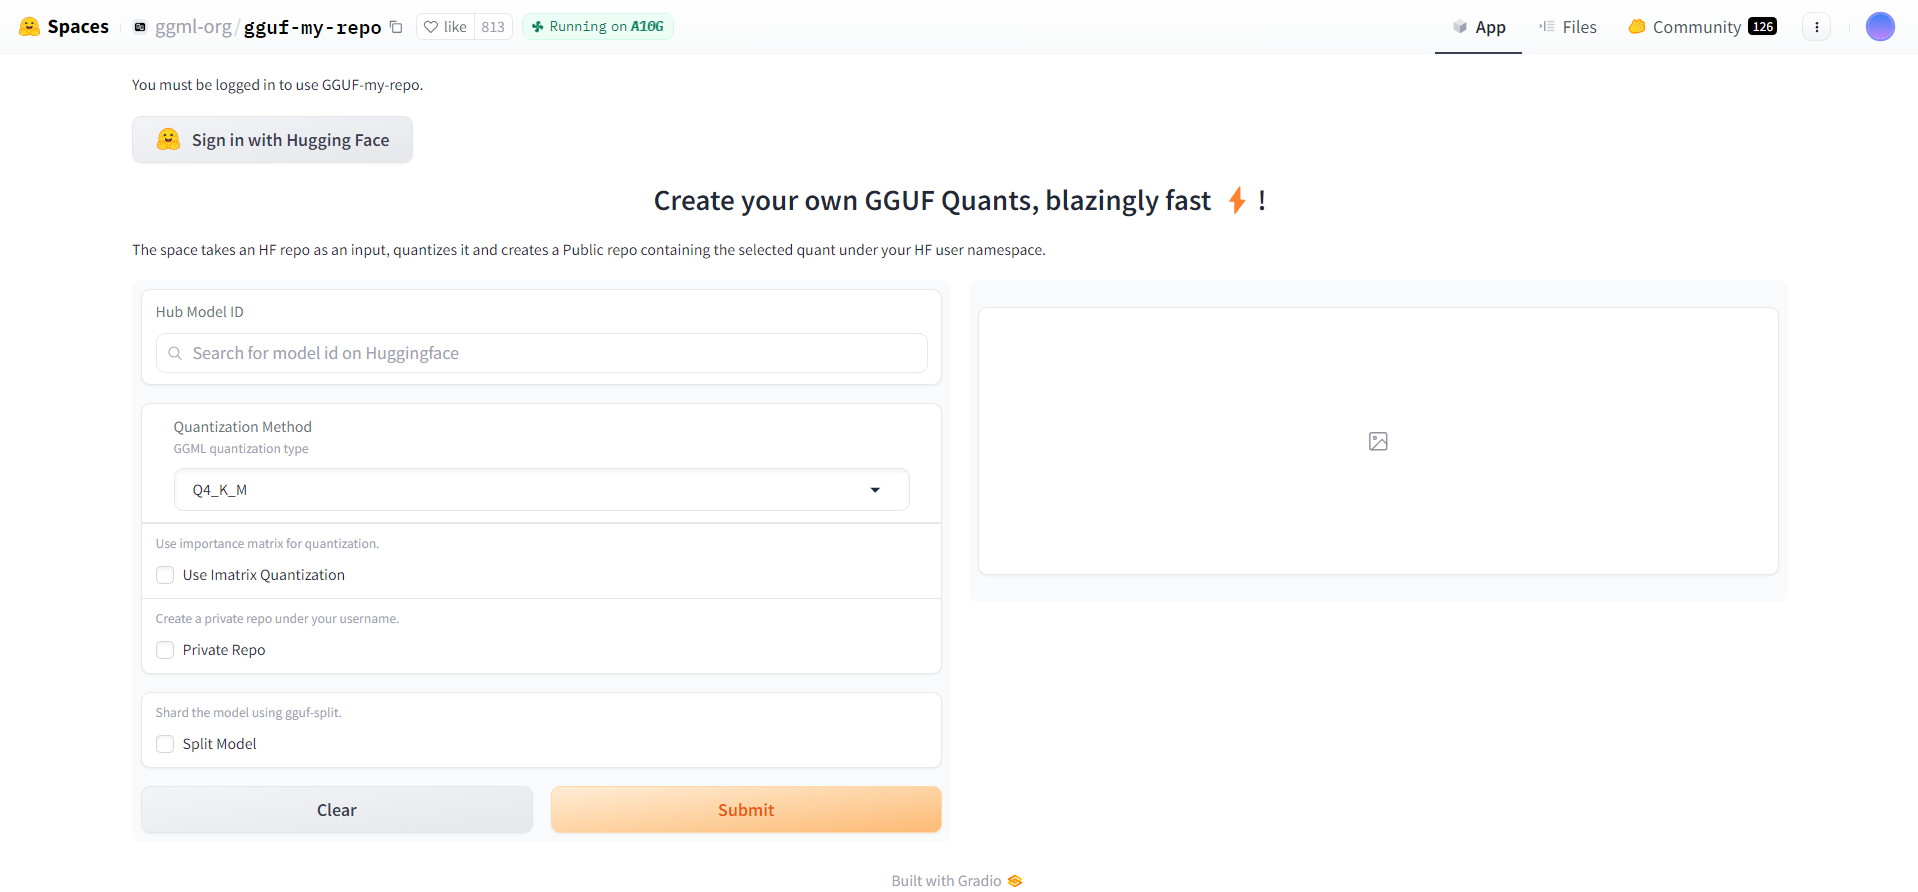
3. Sign in to your Hugging Face account.
4. Search for the model ID in the space.
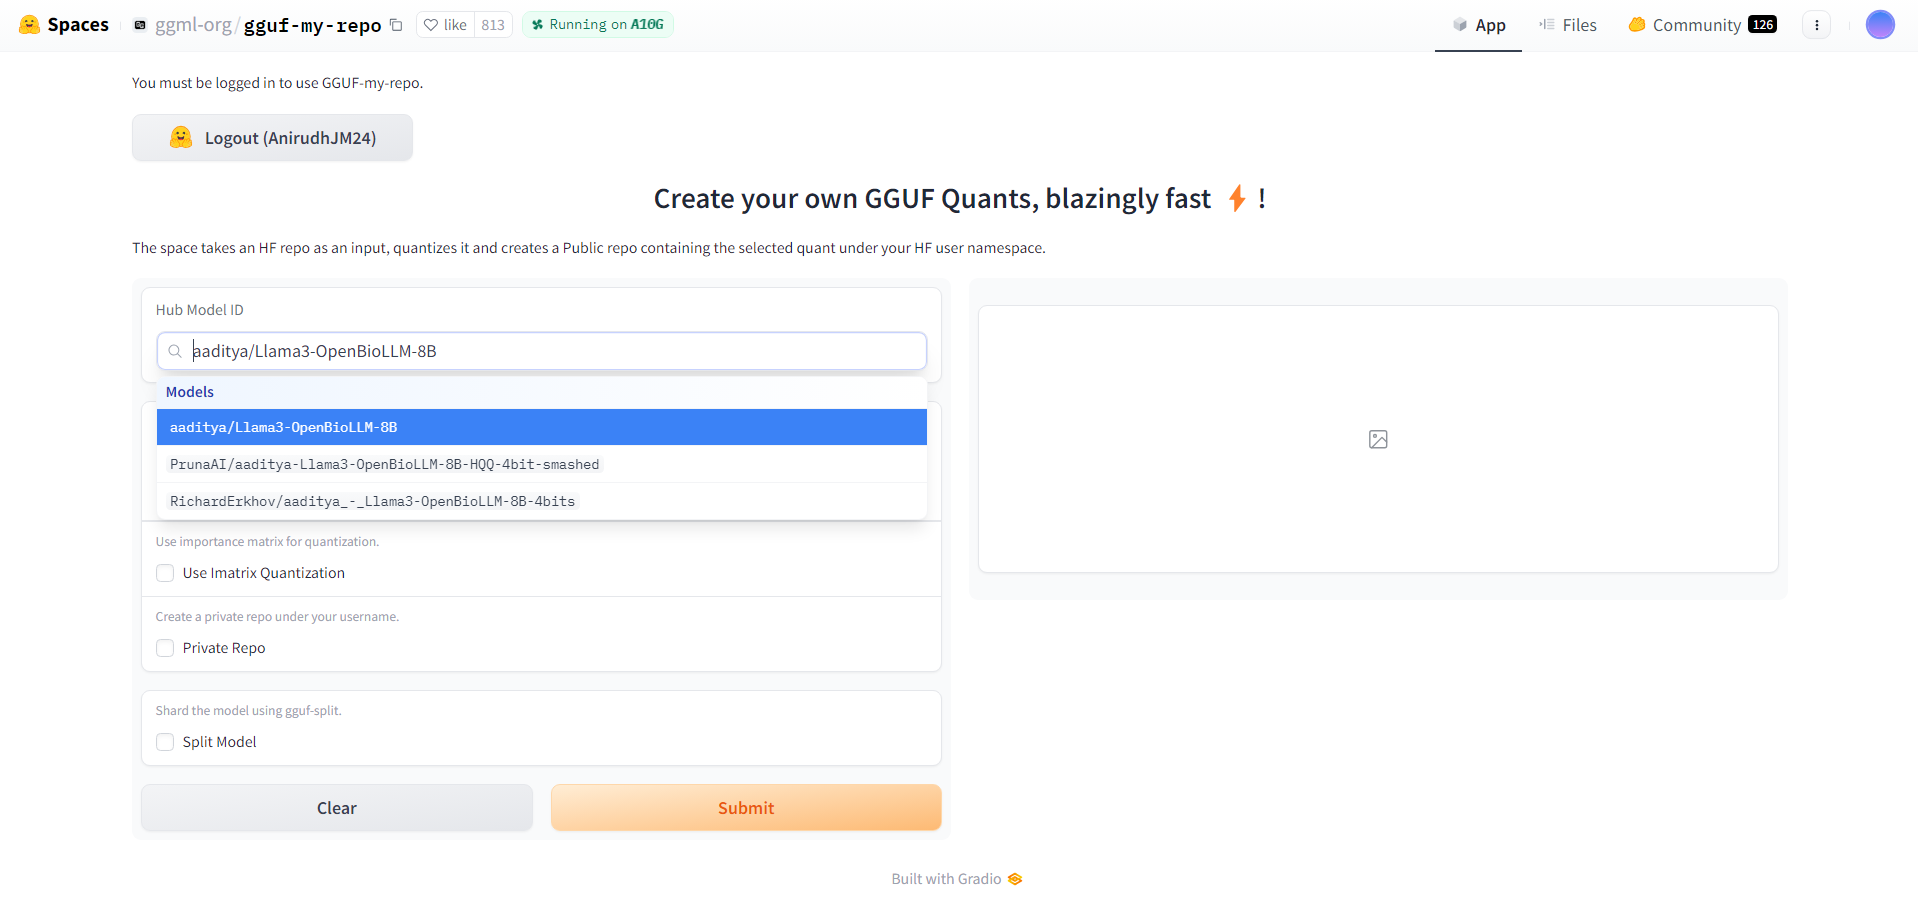
5. Choose the appropriate quantization type. To learn more about GGUF models,quantization and its types please visit https://huggingface.co/docs/hub/en/gguf.
For this recipe we will be using the `Q4_K_M` quantization
6. Submit and wait for the space to generate your quantized model. The Quantization will take upto 2-3 minutes to complete. Post completion, the quantized model will be available on your profile under the **`Models`** section.
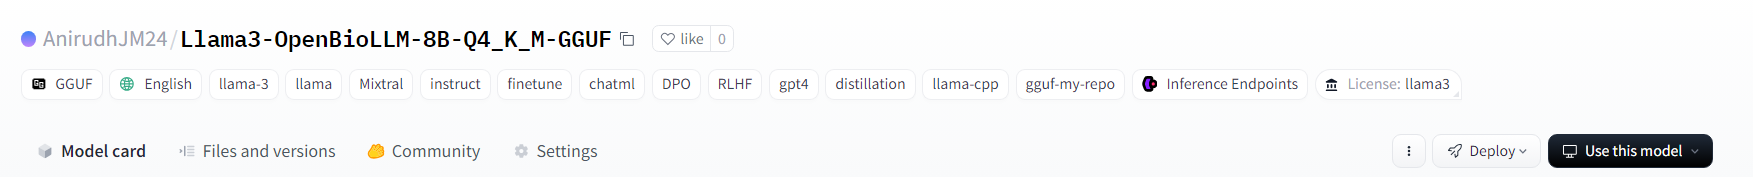

By leveraging the `llama-cpp-python` library, we will be able to perform efficient inference with this quantized LLaMA model, maintaining performance while optimizing for speed and memory usage.

# STEP 2 - SETTING UP THE ENVIRONMENT ON GOOGLE COLAB

Now that we have quantized the model of our choice, let us set up our environment to run inference using `llama-cpp-python` library.

Requirements:

- [`llama-cpp-python`](https://github.com/abetlen/llama-cpp-python)
- [`huggingface hub`](https://pypi.org/project/huggingface-hub/) to install our quantized model
- `ccache` for faster build times

In [ ]:
# Install ccache, a compiler cache tool, which helps to speed up the compilation process by caching previous compilations
!sudo apt-get install -y ccache  # -y flag automatically confirms the installation without prompting the user

In [ ]:
# GPU llama-cpp-python Installation

# 1. To enable GPU support with CUDA, use the following command:
#!CMAKE_ARGS="-DGGML_CUDA=on" FORCE_CMAKE=1 pip install llama-cpp-python  --no-cache-dir --verbose --upgrade

# 2. To install pre-built wheels for your specific CUDA version, first verify your CUDA version:
#    Run `nvcc --version` to check your installed CUDA version.

# 3. Then, run the appropriate installation command with the correct CUDA version:

# For example:
#   pip install llama-cpp-python \
#     --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/<cuda-version>

# Replace <cuda-version> with one of the following options:
# - `cu121`: CUDA 12.1
# - `cu122`: CUDA 12.2
# - `cu123`: CUDA 12.3
# - `cu124`: CUDA 12.4
# - `cu125`: CUDA 12.5

# Example installation for CUDA 12.1:
#   pip install llama-cpp-python \
#     --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu121

! CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 && pip install --no-cache-dir llama-cpp-python==0.2.90 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu122 # The current version of llama-cpp-python at this time (0.3.1) fails to use the GPU on colab

In [ ]:
# To Download the Models
!pip install huggingface_hub

# STEP 3 - SERVING THE MODEL AND RUNNING INFERENCE

1. **Download the Model from Hugging Face Hub**  
   We'll begin by downloading the model using the `huggingface_hub` library. This ensures we have the pre-trained model ready for inference.

2. **Load the Model with llama-cpp-python**  
   With the model downloaded, the next step is to load it using `llama-cpp-python`

3. **Run Inference**  
   Once the model is loaded, we’ll use the chat template provided by the author of the model, provide a prompt and run inference


In [ ]:
# Downloading our model

model_path = 'AnirudhJM24/Llama3-OpenBioLLM-8B-Q4_K_M-GGUF' # Model repo ID
file_path = 'llama3-openbiollm-8b-q4_k_m.gguf' # The quantized model gguf file in your repo

from huggingface_hub import hf_hub_download

quantized_file = hf_hub_download(repo_id=model_path, filename=file_path)

In [ ]:
# Importing the Llama module from the llama_cpp package
from llama_cpp import Llama

# Initializing the Llama model with the quantized model file
# 'model_path' specifies the path to the quantized model file.
# 'chat_format' defines the format to use for chatting, in this case, it's set to "chatml"
lcpp_model = Llama(
    model_path=quantized_file,  # Path to the quantized model file
    chat_format="chatml",# Using the 'chatml' format for conversations
    n_gpu_layers=-1
)


In [ ]:
# Creating a chat completion using the Llama model
# This will simulate a conversation between the system (model) and the user

response = lcpp_model.create_chat_completion(

    messages = [
      {"role": "system", "content": "You are an expert and experienced from the healthcare and biomedical domain with extensive medical knowledge and practical experience. Your name is OpenBioLLM, and you were developed by Saama AI Labs. who's willing to help answer the user's query with explanation. In your explanation, leverage your deep medical expertise such as relevant anatomical structures, physiological processes, diagnostic criteria, treatment guidelines, or other pertinent medical concepts. Use precise medical terminology while still aiming to make the explanation clear and accessible to a general audience."},
      {"role": "user", "content": "How to cure my headache from dehydration?"}
    ],

    # The temperature controls the randomness of the output (higher value = more random)
    temperature=0.7,
)



In [16]:
print(response['choices'][0]['message']['content'])

Dehydration can cause headaches due to the decrease in blood flow to the brain. To alleviate this, you should focus on rehydrating your body. Here are some steps you can take to cure your headache from dehydration:  1. Drink water: The most effective way to rehydrate is by drinking water. Aim for at least 8 glasses (64 ounces) of water throughout the day to replenish the fluids lost through sweating and urine.  2. Avoid caffeine and alcohol: These substances can actually worsen dehydration, so it's best to avoid them, especially if you're already dehydrated.  3. Eat hydrating foods: Incorporate fruits and vegetables such as watermelon, cucumbers, oranges, and bananas into your diet. These contain high water content and can help replace lost fluids.  4. Limit physical activity: If you've been sweating excessively, reducing your physical activity can give your body a chance to recover and rehydrate.  5. Use over-the-counter pain relievers: If your headache is severe, you can consider tak

# Running an 8 Billion Parameter Model with Just 5 GB of RAM


By combining these strategies, it’s possible to run an 8 billion parameter model within a constrained environment, effectively utilizing only 5 GB of RAM. This opens up opportunities for experimentation with large-scale models even on machines with limited resources.



In [18]:
# Use the following command to check GPU usage
!nvidia-smi

Wed Oct  2 17:11:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              27W /  70W |   4859MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--